In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from pandas.tools.plotting import parallel_coordinates
from sklearn.svm import SVC

In [2]:
x_true = np.load('DB_Vecs.npy')
y_true = np.load('DB_Labels.npy')

In [4]:
# print(x_true[0], y_true[0])
print(x_true.shape, y_true.shape)
# plt.scatter(x_true[:,a 4], x_true[:, 5], c=y_true)
# plt.show()

(688, 30) (688,)


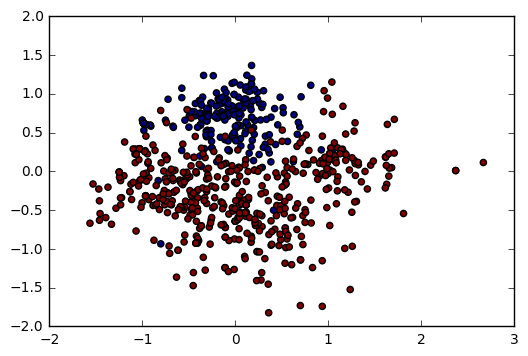

In [51]:
pca = sklearnPCA(n_components=2)
pca_tranformed = pca.fit_transform(x_true)
# print(pca_tranformed)
X = pca_tranformed
y = y_true

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

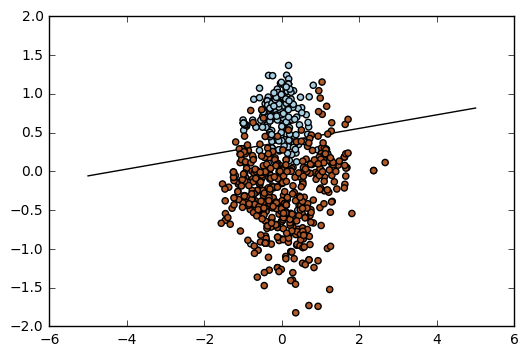

In [60]:
clf = SVC(kernel='linear')
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
    
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
# yy_down = yy - np.sqrt(1 + a ** 2) * margin
# yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.clf()
plt.plot(xx, yy, 'k-')
# plt.plot(xx, yy_down, 'k--')
# plt.plot(xx, yy_up, 'k--')

# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
#         facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
        edgecolors='k')    
plt.show()